# Image Segmentation with CellPose
CellPose is a deep-learning based segmentation algorithm for cells and nuclei in microscopy images.

See also
* [Cellpose in Nature Methods](https://www.nature.com/articles/s41592-020-01018-x)
* [Cellpose on github](https://github.com/MouseLand/cellpose)
* [Cellpose example notebook](https://github.com/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

As usual, we start with loading an example image.

In [1]:
import stackview
from cellpose import models, io
import numpy as np
from skimage.data import human_mitosis

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
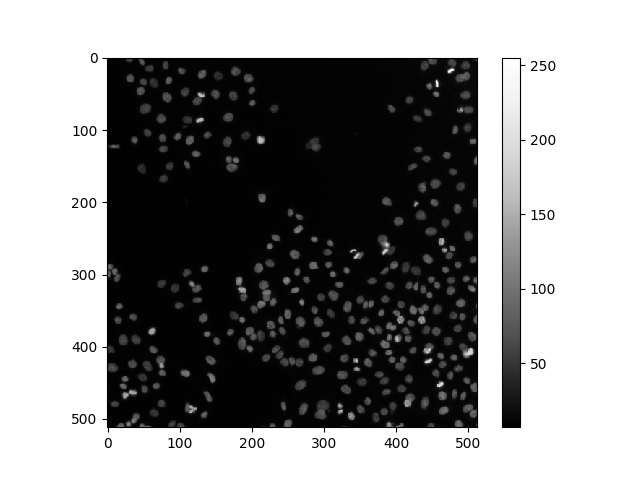
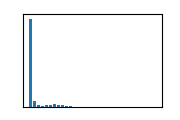

In [2]:
image = human_mitosis()
stackview.insight(image)

## Loading a pretrained model
CellPose comes with a number of pretrained models, e.g. for segmenting images showing cells or nuclei. We will just load a model for segmenting nuclei.

In [3]:
model = models.Cellpose(gpu=False, model_type='nuclei')

We let the model "evaluate" the image to produce masks of segmented nuclei.

In [4]:
channels = [0,0] # This means we are processing single-channel greyscale images.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
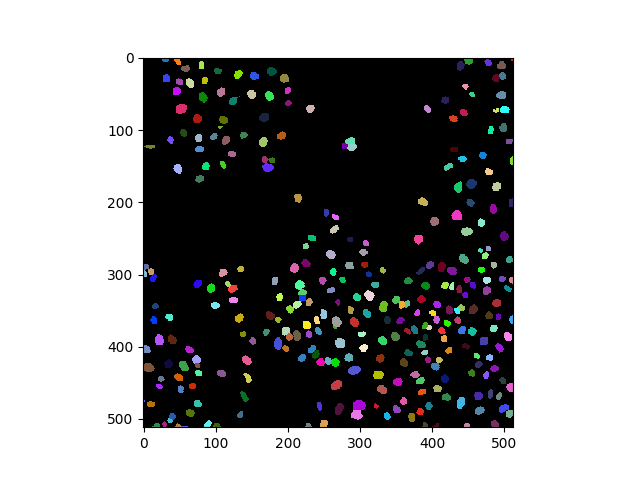

In [5]:
stackview.insight(masks.astype(np.uint32))

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image or by drawing outlines around segmented regions.

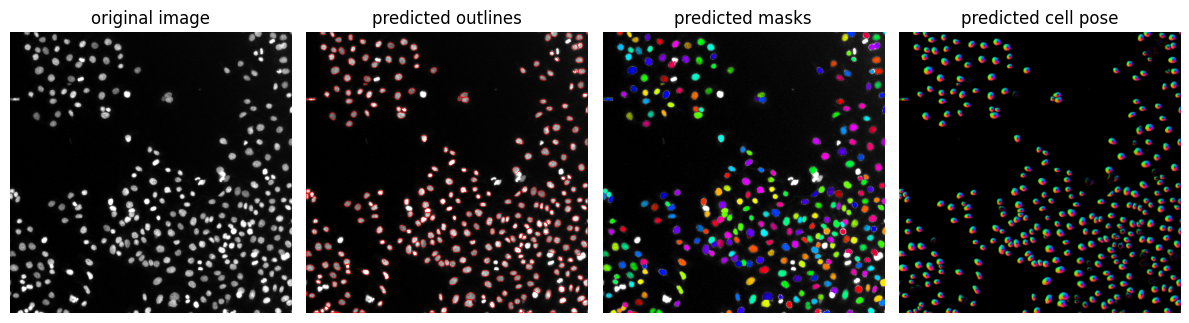

In [6]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

## Exercise
Load `../../data/blobs.tif` and apply Cellpose to it.